<a href="https://colab.research.google.com/github/aSafarpoor/Seminar/blob/main/Data_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

because lack of HW, I decided to remove part of my dataset and keep just part of its entities.

In [ ]:
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
f = open("train.txt", "r")

e1_list = {}
e2_list = {}

c=0
x_list = []
for x in f:
    x_list.append(x)
    ere = x.split()
    try:
        e1_list[ere[0]]+=1
    except:
        e1_list[ere[0]]=1

    try:
        e2_list[ere[2]]+=1
    except:
        e2_list[ere[2]]=1
    
    c+=1

print(c)

86835


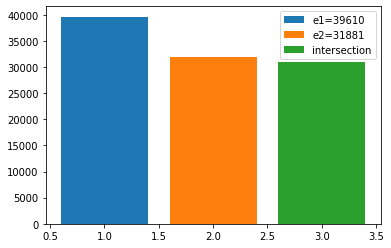

In [ ]:
c = 0
intersection_entity_list = []
temp = e2_list.keys()
for i in e1_list.keys():
    if i in temp:
        c+=1
        intersection_entity_list.append(i)

plt.bar(1,len(e1_list),label="e1="+str(len(e1_list)))
plt.bar(2,len(e2_list),label="e2="+str(len(e2_list)))
plt.bar(3,c,label="intersection")
plt.legend()
plt.show()

len_intersection_e = c

In [ ]:
goal_entity_list = intersection_entity_list[:int(len(intersection_entity_list)*0.5)]

In [ ]:
len(goal_entity_list)

15466

In [ ]:
out_list = []
c = 0
for x in tqdm(x_list):
    c+=1
    ere = x.split()
    if ere[0] in goal_entity_list and ere[2] in goal_entity_list:
        out_list.append(ere)

100%|██████████| 86835/86835 [00:36<00:00, 2396.65it/s]


In [ ]:
print(len(out_list),len(x_list))

26736 86835


In [ ]:
print("mean_degree:")
print("original data:")
print(round(len(out_list)*2/len(goal_entity_list),2))
print("partial data:")
print(round(len(x_list)*2/len_intersection_e,2))

mean_degree:
original data:
3.46
partial data:
5.61


In [ ]:
f = open("train2.txt", "w")
for x in out_list:
    s = '  '.join(x)
    s += '\n'
    f.write(s)
f.close()

In [ ]:

def cleaner(entity_list,file_name,output_filename):
    c = 0
    t = 0
    f = open(file_name, "r")
    fout = open(output_filename, "w")
    for x in f:
        c+=1
        ere = x.split()
        if ere[0] in entity_list and ere[2] in entity_list:
            fout.write(x)
            t+=1

    fout.close()
    f.close()
    print(c,t)

In [ ]:
cleaner(goal_entity_list , "train.txt" , "train2.txt")
cleaner(goal_entity_list , "test.txt"  , "test2.txt")
cleaner(goal_entity_list , "valid.txt" , "valid2.txt")

86835 26736
3134 601
3034 608


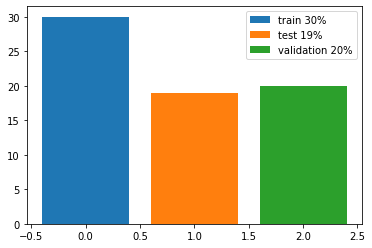

In [ ]:
plt.bar([0],[int(100*26736/86835)],label= 'train '+str(int(100*26736/86835))+"%")
plt.bar([1],[int(100*601/3134)],label= 'test '+str(int(100*601/3134))+"%")
plt.bar([2],[int(608*100/3034)],label= 'validation '+str(int(608*100/3034))+"%")
plt.legend()
plt.show()